# Analysis pipeline for Prolific data

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from battleship.board import Board

In [10]:
%config InlineBackend.figure_format = 'retina'

# set seaborn color palette
sns.set_palette("Set2")

In [11]:
EXPERIMENT_NAME = "battleship-2024-10-03-19-28-28"

PATH_DATA = os.path.join("data", EXPERIMENT_NAME)
PATH_BATCH = os.path.join(PATH_DATA, "batch.csv")
PATH_GAME = os.path.join(PATH_DATA, "game.csv")
PATH_GLOBAL = os.path.join(PATH_DATA, "global.csv")
PATH_PLAYER = os.path.join(PATH_DATA, "player.csv")
PATH_ROUND = os.path.join(PATH_DATA, "round.csv")
PATH_STAGE = os.path.join(PATH_DATA, "stage.csv")

In [18]:
df_stage = pd.read_csv(PATH_STAGE)

# rename id to stageID
df_stage = df_stage.rename(mapper={"id": "stageID"}, axis=1)

# drop all columns that end with LastChangedAt
df_stage = df_stage.loc[:, ~df_stage.columns.str.endswith("LastChangedAt")]

df_stage

,stageID,answered,batchID,bonus,decided,decision,duration,ended,gameID,index,...,occTiles,questionAsked,questionID,questionRated,roundID,spotterRating,start,started,timeoutHandled,timerID
0,01J8QXMYXECV5SBPTWY7SPRSZD,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.27,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,23,...,"[[-1,-1,0,-1,-1,-1,-1,-1],[-1,1,-1,0,-1,-1,-1,...",False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXMYXB3SD93F13XAV3GR7H
1,01J8QZRC8K5TWM8DDHBVE7Q377,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.67,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,12,...,"[[-1,-1,-1,-1,-1,2,2,-1],[-1,-1,-1,-1,-1,-1,-1...",False,NaN,False,01J8QZHHS6CS3PJ97PTBWADVY2,NaN,True,True,False,01J8QZRC8F962RJCS6V17KQQTX
2,01J8FS339ME3D1CHDPP4BYYAVX,False,01J8FREKT8BGPGDSR36MT2VDMM,3.80,False,NaN,60,True,01J8FREKTNWTBRQ7MEBXPJ5D4B,27,...,"[[-1,1,1,1,1,-1,-1,-1],[-1,0,-1,-1,-1,-1,-1,-1...",False,NaN,False,01J8FRW0NCC50JFS0D5XF5HTMH,NaN,True,True,False,01J8FS339H45FRSP1AB5NNABGT
3,01J8QWAZ34MDMRJEE9DHSKV8NY,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.67,True,fire,60,True,01J8QW1WQH1C4G0644AYGBHBJR,15,...,"[[-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,...",False,NaN,False,01J8QW4CP7J8SSPA6PE5K52G41,NaN,True,True,False,01J8QWAZ32XBSXAPNWXKGRDJJ6
4,01J8QZGRFK79WTCMCK4ES3C8MR,False,01J8QW1WQ3Y1MK95H4W2F810DB,0.87,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,65,...,"[[-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,...",False,NaN,False,01J8QYPVK10N4MW5M25N1KJTMS,NaN,True,True,False,01J8QZGRFF0NQCSC6VBAEK2YF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,01J8QZVJD8Z4B5N70YH1TQ36NG,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.47,True,question,60,True,01J8QW1WQH1C4G0644AYGBHBJR,20,...,"[[-1,-1,-1,-1,-1,2,2,2],[-1,-1,-1,-1,-1,-1,-1,...",False,NaN,False,01J8QZHHS6CS3PJ97PTBWADVY2,NaN,True,True,False,01J8QZVJD4MVDRP0VNPF4ETR5Y
557,01J8R032Q40ZKFXRCSPWEDM5YF,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.07,True,fire,60,True,01J8QW1WQH1C4G0644AYGBHBJR,47,...,"[[-1,-1,-1,-1,-1,2,2,2],[-1,-1,-1,-1,-1,-1,-1,...",False,NaN,False,01J8QZHHS6CS3PJ97PTBWADVY2,NaN,True,True,False,01J8R032Q1EH5X6GSV0XZPGPGS
558,01J8FS2DNHY1VB42X9H2WSMA1E,False,01J8FREKT8BGPGDSR36MT2VDMM,3.80,True,fire,60,True,01J8FREKTNWTBRQ7MEBXPJ5D4B,20,...,"[[-1,-1,-1,-1,-1,-1,-1,-1],[-1,0,-1,-1,-1,-1,-...",False,NaN,False,01J8FRW0NCC50JFS0D5XF5HTMH,NaN,True,True,False,01J8FS2DNEYC969BVPGBDCJWNZ
559,01J8FSE7PDJD4M1H72FAHY75SY,False,01J8FREKT8BGPGDSR36MT2VDMM,0.80,True,fire,60,True,01J8FREKTNWTBRQ7MEBXPJ5D4B,66,...,"[[1,1,1,1,1,0,-1,-1],[-1,0,-1,-1,-1,-1,-1,-1],...",False,NaN,False,01J8FRW0NCC50JFS0D5XF5HTMH,NaN,True,True,False,01J8FSE7PAQNZXWQ2SV54YYN9F


In [19]:
df_round = pd.read_csv(PATH_ROUND)

# rename id to roundID
df_round = df_round.rename(mapper={"id": "roundID"}, axis=1)

# drop all columns that end with LastChangedAt
df_round = df_round.loc[:, ~df_round.columns.str.endswith("LastChangedAt")]

df_round

,roundID,answer,batchID,board_id,decision,ended,firingTimedOut,gameID,gameOver,index,...,questionsRemaining,score,ships,shipsSunk,skippedToFiring,spotterRatings,spotterTimedOut,stageIndex,start,trueTiles
0,01J8FRCBTHW8E05BRAERTKT4ZP,NaN,01J8FR8BKTM6T39B8EBABYWPN4,1,NaN,True,False,01J8FR8BMJHJ4PTHXAV1RCQTQD,False,0,...,10,0,"[1,2,3,4]","[[1,[false,4]],[2,[false,3]],[3,[false,2]],[4,...",False,[],False,1,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
1,01J8QW2P638FT9E7TWK16XMH7Y,NaN,01J8QW1WQ3Y1MK95H4W2F810DB,1,NaN,True,False,01J8QW1WQH1C4G0644AYGBHBJR,False,0,...,10,0,"[1,2,3,4]","[[1,[false,4]],[2,[false,3]],[3,[false,2]],[4,...",False,[],False,1,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
2,01J8QWRGJAED3GCGJWCSHMSNAV,(answer timed out),01J8QW1WQ3Y1MK95H4W2F810DB,2,fire,True,False,01J8QW1WQH1C4G0644AYGBHBJR,True,2,...,0,0,"[1,2,3,4]","[[1,[true,5]],[2,[true,3]],[3,[true,4]],[4,[tr...",False,"[[""are there more ships on the left side of th...",False,79,True,"[[1,1,1,1,1,0,0,0],[0,0,0,0,0,0,0,0],[0,4,4,0,..."
3,01J8QY0WYGAFY048HB8G0H3J2Z,(answer timed out),01J8QW1WQ3Y1MK95H4W2F810DB,4,fire,True,False,01J8QW1WQH1C4G0644AYGBHBJR,True,4,...,0,0,"[1,2,3,4]","[[1,[true,2]],[2,[true,2]],[3,[true,3]],[4,[tr...",False,"[[""is the longest ship in the top half of the ...",False,81,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,..."
4,01J8FRDKKQ13S72M0HTY3HAS2T,NaN,01J8FR8BKTM6T39B8EBABYWPN4,1,(decision timed out),True,False,01J8FR8BMJHJ4PTHXAV1RCQTQD,False,1,...,10,0,"[1,2,3,4]","[[1,[false,4]],[2,[false,3]],[3,[false,2]],[4,...",False,[],False,2,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
5,01J8FRFW9A0XHMBDQ3HQXVV450,NaN,01J8FREKT8BGPGDSR36MT2VDMM,1,NaN,True,False,01J8FREKTNWTBRQ7MEBXPJ5D4B,False,0,...,10,0,"[1,2,3,4]","[[1,[false,4]],[2,[false,3]],[3,[false,2]],[4,...",False,[],False,1,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
6,01J8FRGT00PFJB6EG3TY82FNWG,(answer timed out),01J8FREKT8BGPGDSR36MT2VDMM,1,fire,True,False,01J8FREKTNWTBRQ7MEBXPJ5D4B,True,1,...,6,0,"[1,2,3,4]","[[1,[true,4]],[2,[true,3]],[3,[true,2]],[4,[tr...",False,"[[""Is the red ship horizontal?"",5],[""Are there...",False,44,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
7,01J8FRW0NCC50JFS0D5XF5HTMH,(answer timed out),01J8FREKT8BGPGDSR36MT2VDMM,2,fire,True,False,01J8FREKTNWTBRQ7MEBXPJ5D4B,True,2,...,0,0,"[1,2,3,4]","[[1,[true,5]],[2,[true,3]],[3,[false,4]],[4,[t...",False,"[[""Does the left half of the board have more s...",False,71,True,"[[1,1,1,1,1,0,0,0],[0,0,0,0,0,0,0,0],[0,4,4,0,..."
8,01J8QW4CP7J8SSPA6PE5K52G41,(answer timed out),01J8QW1WQ3Y1MK95H4W2F810DB,1,fire,True,False,01J8QW1WQH1C4G0644AYGBHBJR,True,1,...,0,0,"[1,2,3,4]","[[1,[true,4]],[2,[true,3]],[3,[true,2]],[4,[tr...",False,"[[""Are there more ship tiles in the top half o...",False,68,True,"[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,1,1,1,..."
9,01J8QXE1CN3V8FV17EBW8STE3E,(answer timed out),01J8QW1WQ3Y1MK95H4W2F810DB,3,fire,True,False,01J8QW1WQH1C4G0644AYGBHBJR,True,3,...,0,0,"[1,2,3,4]","[[1,[true,5]],[2,[true,3]],[3,[true,2]],[4,[tr...",False,"[[""More tiles in top half?"",5],[""Topleft of la...",False,75,True,"[[0,1,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,1,0,0,..."


In [24]:
ROUND_COLUMNS = ["roundID"] + ["board_id"]

df = df_stage.merge(df_round[ROUND_COLUMNS], on="roundID")
df

,stageID,answered,batchID,bonus,decided,decision,duration,ended,gameID,index,...,questionAsked,questionID,questionRated,roundID,spotterRating,start,started,timeoutHandled,timerID,board_id
0,01J8QXMYXECV5SBPTWY7SPRSZD,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.27,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,23,...,False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXMYXB3SD93F13XAV3GR7H,3
1,01J8QXTCW1EC8C7K1W00M930TF,False,01J8QW1WQ3Y1MK95H4W2F810DB,0.87,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,40,...,False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXTCVYQA43NP18XY581CPK,3
2,01J8QXTE1YK7C8PCT6W2FDCB4W,False,01J8QW1WQ3Y1MK95H4W2F810DB,0.87,True,fire,60,True,01J8QW1WQH1C4G0644AYGBHBJR,41,...,False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXTE1WGAK7823PY95973WJ,3
3,01J8QXYB6DD95MBDYAB0HTTZNG,False,01J8QW1WQ3Y1MK95H4W2F810DB,0.07,False,NaN,60,True,01J8QW1WQH1C4G0644AYGBHBJR,60,...,False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXYB69K6ABFW73XQ6TWMNJ,3
4,01J8QXKDNZMXMNRQ50JFFCZ0W6,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.67,True,fire,60,True,01J8QW1WQH1C4G0644AYGBHBJR,12,...,False,NaN,False,01J8QXE1CN3V8FV17EBW8STE3E,NaN,True,True,False,01J8QXKDNWTPZJ86PD4BG5C5DT,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,01J8FRDKM2KAYT3BDQ65RQXH9R,False,01J8FR8BKTM6T39B8EBABYWPN4,5.00,False,NaN,60,True,01J8FR8BMJHJ4PTHXAV1RCQTQD,1,...,False,NaN,False,01J8FRDKKQ13S72M0HTY3HAS2T,NaN,True,True,True,01J8FRDKKZ9Z995DQ7ER3VCK51,1
557,01J8FRDKM2KAYT3BDQ5E7PV16T,False,01J8FR8BKTM6T39B8EBABYWPN4,5.00,False,NaN,60,True,01J8FR8BMJHJ4PTHXAV1RCQTQD,0,...,False,NaN,False,01J8FRDKKQ13S72M0HTY3HAS2T,NaN,True,True,False,01J8FRDKKWKZHZDXM9A770Q4TC,1
558,01J8QW2P6W6P08CN2TCYEF15VF,False,01J8QW1WQ3Y1MK95H4W2F810DB,1.27,False,NaN,300,True,01J8QW1WQH1C4G0644AYGBHBJR,0,...,False,NaN,False,01J8QW2P638FT9E7TWK16XMH7Y,NaN,True,True,False,01J8QW2P6MC80K76SNNDM68W7Y,1
559,01J8FRCBV7PP73RACZTYAZMPX0,False,01J8FR8BKTM6T39B8EBABYWPN4,4.40,False,NaN,300,True,01J8FR8BMJHJ4PTHXAV1RCQTQD,0,...,False,NaN,False,01J8FRCBTHW8E05BRAERTKT4ZP,NaN,True,True,False,01J8FRCBV2H3251VFRKNASTX1Z,1


In [25]:
df.columns

Index(['stageID', 'answered', 'batchID', 'bonus', 'decided', 'decision',
       'duration', 'ended', 'gameID', 'index', 'initialized', 'messageText',
       'messageTime', 'messageType', 'moved', 'name', 'occTiles',
       'questionAsked', 'questionID', 'questionRated', 'roundID',
       'spotterRating', 'start', 'started', 'timeoutHandled', 'timerID',
       'board_id'],
      dtype='object')

In [33]:
df["messageType"].value_counts()

messageType
decision    237
move        162
answer       74
question     74
Name: count, dtype: int64

In [34]:
df["name"].value_counts()

name
shared_stage           245
shared_stage_3         162
shared_stage_2          74
shared_stage_1          74
end_of_instructions      3
instructions             3
Name: count, dtype: int64

In [27]:
df["board_id"].value_counts()

board_id
2    150
1    117
4     81
3     75
5     71
6     67
Name: count, dtype: int64

In [31]:
df["messageText"].value_counts()

messageText
fire                                                     162
question                                                  74
yes                                                       54
no                                                        20
F5                                                         5
                                                        ... 
Are there any ships on the edges of the board?             1
Is purple in cols 1-2?                                     1
A8                                                         1
ship in column E or G, on the left side of the board?      1
(decision timed out)                                       1
Name: count, Length: 133, dtype: int64

# Visualizations

## Number of moves to win

In [29]:
df_move_counts = (
    df[(df["messageType"] == "move")]
    .groupby(["gameID", "board_id"])
    .size()
    .to_frame("move_count")
)
df_move_counts

move_count
gameID                     board_id            
01J8FREKTNWTBRQ7MEBXPJ5D4B 1                 15
                           2                 20
01J8QW1WQH1C4G0644AYGBHBJR 1                 18
                           2                 24
                           3                 22
                           4                 25
                           5                 20
                           6                 18

In [36]:
df_question_counts = df[
    (df["messageType"] == "question")
    # & (df["message_text"] != "(question skipped)")
    # & ~df["board_id"].isin(["test_1", "test_2"])
]
df_question_counts = (
    df_question_counts.groupby(["gameID", "board_id"]).size().to_frame("question_count")
)
df_question_counts

question_count
gameID                     board_id                
01J8FREKTNWTBRQ7MEBXPJ5D4B 1                      4
                           2                     10
01J8QW1WQH1C4G0644AYGBHBJR 1                     10
                           2                     10
                           3                     10
                           4                     10
                           5                     10
                           6                     10

In [38]:
df_counts = df_move_counts.join(df_question_counts)
# replace null values with 0
df_counts = df_counts.fillna(0)
df_counts["question_count"] = df_counts["question_count"].astype(int)
df_counts = df_counts.sort_values(["gameID", "board_id"]).reset_index(drop=False)
df_counts

,gameID,board_id,move_count,question_count
0,01J8FREKTNWTBRQ7MEBXPJ5D4B,1,15,4
1,01J8FREKTNWTBRQ7MEBXPJ5D4B,2,20,10
2,01J8QW1WQH1C4G0644AYGBHBJR,1,18,10
3,01J8QW1WQH1C4G0644AYGBHBJR,2,24,10
4,01J8QW1WQH1C4G0644AYGBHBJR,3,22,10
5,01J8QW1WQH1C4G0644AYGBHBJR,4,25,10
6,01J8QW1WQH1C4G0644AYGBHBJR,5,20,10
7,01J8QW1WQH1C4G0644AYGBHBJR,6,18,10


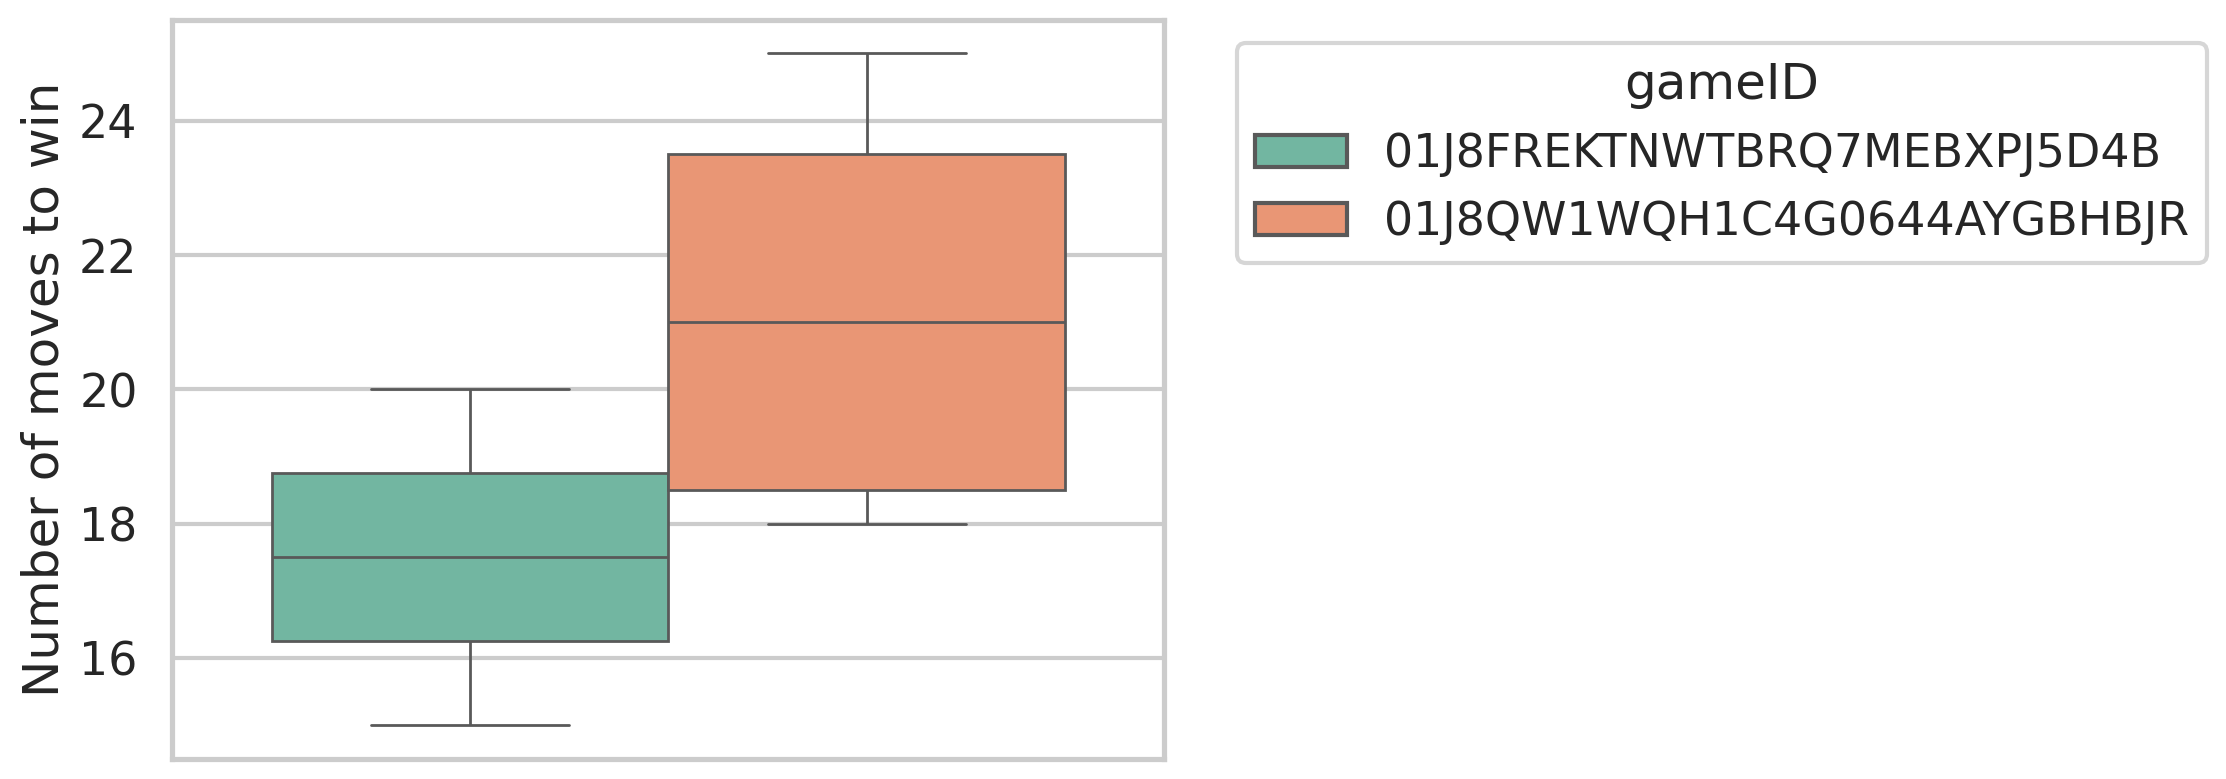

In [39]:
with sns.plotting_context("talk"), sns.axes_style("whitegrid"):

    sns.boxplot(
        data=df_counts,
        y="move_count",
        hue="gameID",
        hue_order=df_counts["gameID"].unique(),
    )

    plt.ylabel("Number of moves to win")

    # move legend outside of plot
    plt.legend(title="gameID", bbox_to_anchor=(1.05, 1), loc="upper left")

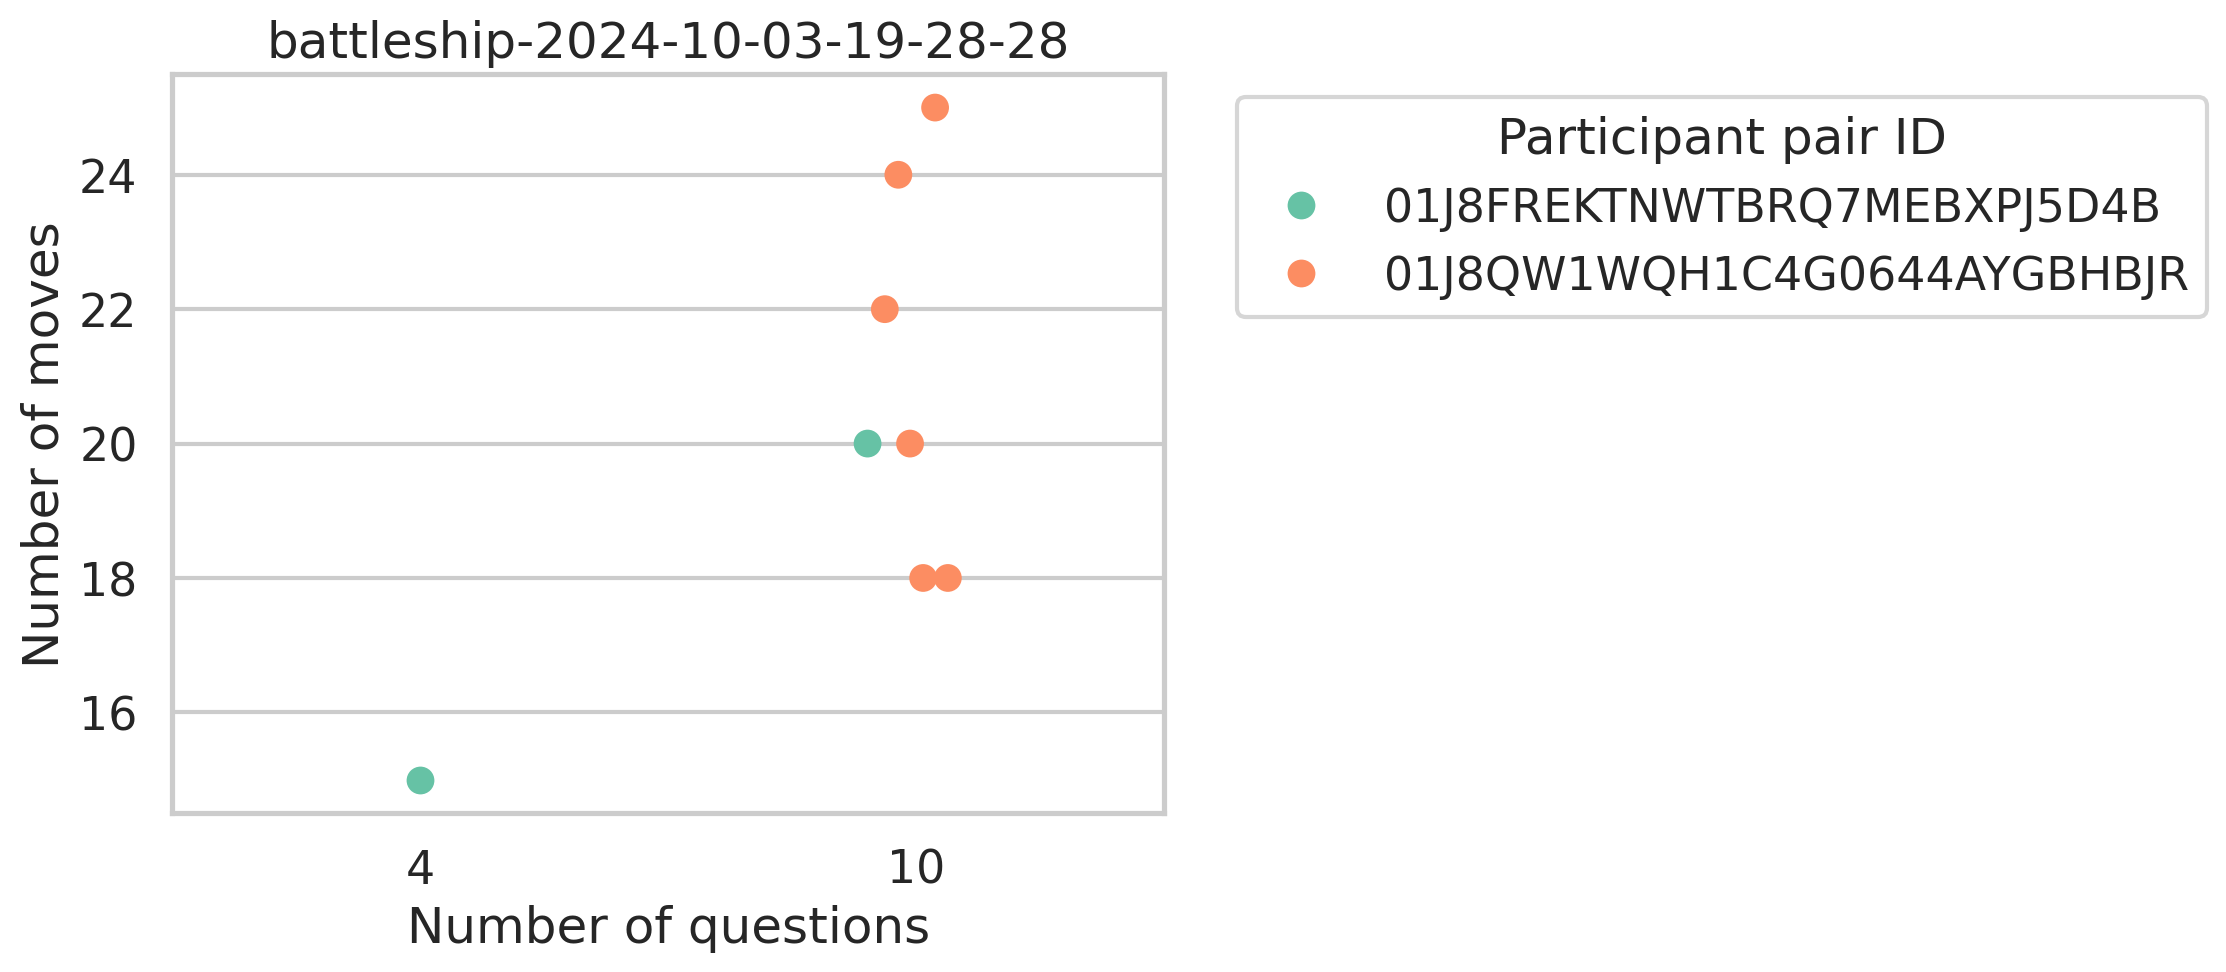

In [40]:
with sns.plotting_context("talk"), sns.axes_style("whitegrid"):

    sns.stripplot(
        data=df_counts,
        x="question_count",
        y="move_count",
        hue="gameID",
        hue_order=df_counts["gameID"].unique(),
        size=10.0,
    )

    plt.xlabel("Number of questions")
    plt.ylabel("Number of moves")

    # move legend outside of plot
    plt.legend(title="Participant pair ID", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.title(f"{EXPERIMENT_NAME}")

In [334]:
df_stage["messages"].iloc[0]

'[{"text":"Is the largest ship verticle?","type":"question","time":34340},{"text":"yes","type":"answer","time":6700},{"text":"C3","type":"move","time":10886},{"text":"Is the largest ship to right or left of number 4? use yes for left and no for right.","type":"question","time":81111},{"text":"yes","type":"answer","time":14806},{"text":"D2","type":"move","time":8202},{"text":"(question skipped)","type":"question","time":8911},{"text":"(no question asked)","type":"answer","time":null},{"text":"D1","type":"move","time":0},{"text":"(question skipped)","type":"question","time":28760},{"text":"(no question asked)","type":"answer","time":1},{"text":"E1","type":"move","time":67},{"text":"(question skipped)","type":"question","time":949},{"text":"(no question asked)","type":"answer","time":15005},{"text":"F1","type":"move","time":1642},{"text":"(question skipped)","type":"question","time":1543},{"text":"(no question asked)","type":"answer","time":1},{"text":"C1","type":"move","time":1853},{"tex